<a href="https://colab.research.google.com/github/sunshineprakhar/DDA14211/blob/Time-Series/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Symbolic Aggregate approXimation**

**Basic Idea of SAX start with PAA.**

In **Piecewise Aggregate Approximation**, each sequence
of time series data is divided into k segments with
equal length and the average value of each segment is
used as a coordinate of a k-dimensional feature vector.
The advantages of this transform are that 
1.   it is very fast and easy to implement, and
2.   the index can be build in linear time.

And to reduce the time series from n
dimensions to k dimensions, the data is divided into k
equal sized segments.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import PiecewiseAggregateApproximation

df= pd.read_csv('airline-passengers.csv', header=0, index_col=0)
df.head()


,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


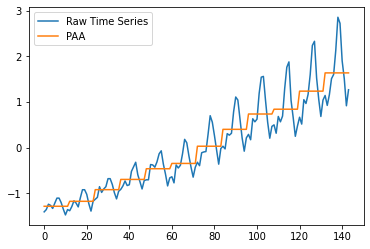

In [4]:
df_Series=df.iloc[:,0]
dataset = df_Series.values
dataset=dataset.reshape(1, 144)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
dataset = scaler.fit_transform(dataset)
paa = PiecewiseAggregateApproximation(n_segments=12)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(dataset))
plt.plot(dataset[0].ravel(),label='Raw Time Series')
plt.plot(paa_dataset_inv[0].ravel(), label='PAA')
plt.legend(loc='best')
plt.show()

In **Symbolic Aggregate approXimation**, firstly the data is transformed into the PAA representation and then the transformed PAA
representation is symbolized into a sequence of discrete strings.

Breakpoints may be
determined by looking them up in a statistical table

B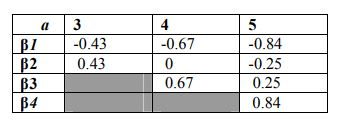

In [5]:
#Return Series
df_Series=df.iloc[:,0]
df_Series

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Name: Passengers, Length: 144, dtype: int64

In [6]:
dataset = df_Series.values
dataset.shape

(144,)

In [7]:
dataset=dataset.reshape(1, 144)
dataset.shape

(1, 144)

In [8]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) 
dataset = scaler.fit_transform(dataset)
dataset

array([[[-1.40777884],
        [-1.35759023],
        [-1.24048348],
        [-1.26557778],
        [-1.33249593],
        [-1.21538918],
        [-1.10664719],
        [-1.10664719],
        [-1.20702441],
        [-1.34922546],
        [-1.47469699],
        [-1.35759023],
        [-1.38268454],
        [-1.29067209],
        [-1.16520057],
        [-1.21538918],
        [-1.29903686],
        [-1.09828242],
        [-0.9226223 ],
        [-0.9226223 ],
        [-1.02299951],
        [-1.23211871],
        [-1.3910493 ],
        [-1.17356534],
        [-1.1317415 ],
        [-1.08991766],
        [-0.85570415],
        [-0.98117567],
        [-0.90589276],
        [-0.85570415],
        [-0.68004402],
        [-0.68004402],
        [-0.80551554],
        [-0.98954044],
        [-1.12337673],
        [-0.95608137],
        [-0.91425753],
        [-0.83897462],
        [-0.73023263],
        [-0.83060985],
        [-0.81388031],
        [-0.52111343],
        [-0.42073621],
        [-0

In [20]:
sax = SymbolicAggregateApproximation(n_segments= 12,  alphabet_size_avg=3)
sax

SymbolicAggregateApproximation(alphabet_size_avg=3, n_segments=12)

In [21]:
#Fit a SAX representation and transform the data accordingly.
sax.fit_transform(dataset)

array([[[0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [2],
        [2],
        [2],
        [2]]])

In [23]:
#Compute time series corresponding to given SAX representations. 
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))

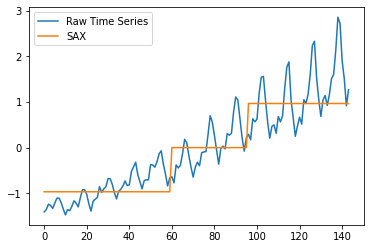

In [24]:
plt.plot(dataset[0].ravel(),label='Raw Time Series')
plt.plot(sax_dataset_inv[0].ravel(), label='SAX')
plt.legend(loc='best')
plt.show()